# Desafío Spike - Oscar Mauriaca

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url_costomg_real = 'https://storage.googleapis.com/sistema_electrico_chile/costo_marginal_real.csv'
url_costomg_prog = 'https://storage.googleapis.com/sistema_electrico_chile/costo_marginal_programado.csv'
url_base_pred = 'https://storage.googleapis.com/sistema_electrico_chile/base_para_prediccion.csv'
url_clima = 'https://storage.googleapis.com/sistema_electrico_chile/datos_clima.csv'

# 1. Costos marginales

In [3]:
df_real = pd.read_csv(url_costomg_real)
df_prog = pd.read_csv(url_costomg_prog)

In [4]:
df_real.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


In [5]:
df_prog.head()

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [6]:
print(f'El tamaño del dataset de costos marginales real es: {df_real.shape}')
print(f'El tamaño del dataset de costos marginales programados es: {df_prog.shape}')

El tamaño del dataset de costos marginales real es: (4309951, 7)
El tamaño del dataset de costos marginales programados es: (1192124, 5)




Observamos que la base de datos de costos marginales programados posee datos duplicados. Por ejemplo en la siguiente celda se observa que para la misma barra, misma fecha existen dos para cada hora del día.



In [7]:
df_prog[(df_prog['mnemotecnico_barra']=='BA83L131SE134L131') & (df_prog['fecha']=='2019-06-06')]

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
1192076,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,1,48.930459
1192077,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,2,47.723161
1192078,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,3,47.608940
1192079,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,4,46.289543
1192080,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,5,46.103264
1192081,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,6,47.664590
1192082,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,7,49.105734
1192083,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,8,48.973171
1192084,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,9,44.916320
1192085,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,10,42.096565


Decidir que hacer con los datos duplicados en general dependerá de la fuente del problema. En este caso, no sabemos si son datos anomalos o hubo un cambio en la metodologia para la predicción de datos y volvieron a rehacer las predicciones. En este caso y para no complicarnos tanto, vamos a utilizar la funcion duplicated de pandas para que se encargue del problema, en caso de haber duplicados va a mantener la primera fila y eliminará el siguiente duplicado.

In [8]:
duplicate_rows_prog = df_prog[df_prog.duplicated(
    ['mnemotecnico_barra', 'nombre_barra', 'fecha', 'hora'])]

In [9]:
duplicate_rows_prog['mnemotecnico_barra'].unique()

array(['-', 'BA01T002SE036T002', 'BA02T003SE004T003', 'BA83L131SE134L131'],
      dtype=object)

In [10]:
duplicate_rows_prog.shape

(188229, 5)

Vemos que para las barras "-, BA01T002SE036T002, BA02T003SE004T003, BA83L131SE134L131" se tienen duplicados. Además la cantidad de filas duplicadas es de 188229.

In [11]:
# Finalmente botamos los duplicados de la base df_prog
df_prog.drop_duplicates(
    subset=['mnemotecnico_barra', 'nombre_barra', 'fecha', 'hora'], inplace=True)

In [12]:
# Renombramos la columna para que sea consistente con la base df_real
df_prog.rename(columns = {'mnemotecnico_barra': 'barra_mnemotecnico'}, inplace = True)

Para realizar el merge podemos hacerlo de forma: inner, outer, left y right. En este caso en particular, voy a utilizar inner (default de la función merge) dado que me interesa analizar unicamente los casos donde tenemos el costo tanto programado como real para una barra.

In [13]:
# Realizamos el merge
costo_marginal = pd.merge(df_real, df_prog, on=[
                          'barra_mnemotecnico', 'fecha', 'hora'], how='inner')

###  Análisis exploratorio

In [15]:
costo_marginal.head(10)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,54.292145
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA S/E SAN CRISTOBAL 110KV B1,56.086260
5,BA85L123SE103L123,BA02T002SE032T002,2019-04-06,25,57.37,38.22678,BA S/E MANTOS BLANCOS 220KV,BA S/E MANTOS BLANCOS 220KV,62.333987
6,BA97G216SE106G216,BA02T002SE032T002,2019-04-06,25,56.82,37.86030,BA S/E MEJILLONES 220KV,BA S/E MEJILLONES 220KV,61.267126
7,BA25L120SE115L120,BA02T002SE032T002,2019-04-06,25,59.58,39.69935,BA S/E OGP1 220KV - BP1,BA S/E OGP1 220KV - BP1,65.134123
8,BA47L120SE122L120,BA02T002SE032T002,2019-04-06,25,59.44,39.60606,BA S/E PLANTA ÓXIDOS 220KV,BA S/E PLANTA ÓXIDOS 220KV,65.021578
9,BA27L114SE162L114,BA02T002SE032T002,2019-04-06,25,57.97,38.62657,Nodo Tap Off Enlace 220kv Lado LÍnea,Nodo Tap Off Enlace 220kv Lado LÍnea,63.846067


In [16]:
costo_marginal.tail(10)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
900919,BA01R002SE039R002,BA02T002SE032T002,2019-01-23,24,76.57,51.48720,BA S/E RENCA 110KV BP1,BA S/E RENCA 110KV BP1,55.235560
900920,BA01T005SE284T005,BA02T002SE032T002,2019-01-23,24,64.55,43.40471,BA S/E TALTAL (ELECDA) 13.2KV,BA S/E TALTAL (ELECDA) 13.2KV,131.486326
900921,BA01L004SE001L004,BA02T002SE032T002,2019-01-23,24,78.36,52.69083,BA S/E GRANEROS INDURA 66KV,BA S/E GRANEROS INDURA 66KV,56.415829
900922,BA01T002SE032T002,BA02T002SE032T002,2019-01-23,24,75.14,50.52564,BA S/E QUILLOTA 110KV,BA S/E QUILLOTA 110KV,54.161349
900923,BA72G216SE028G216,BA02T002SE032T002,2019-01-23,24,63.29,42.55746,BA S/E CAPRICORNIO 110KV BP,BA S/E CAPRICORNIO 110KV BP,132.250024
900924,BA05T005SE288T005,BA02T002SE032T002,2019-01-23,24,63.65,42.79953,BA S/E SUR 110KV,BA S/E SUR 110KV,132.934674
900925,BA01L081SE066L081,BA02T002SE032T002,2019-01-23,24,73.18,49.20770,BA S/E FPC 154KV BP1,BA S/E FPC 154KV BP1,53.174872
900926,BA04T005SE071T005,BA02T002SE032T002,2019-01-23,24,67.20,45.18662,BA S/E OVALLE 66KV,BA S/E OVALLE 66KV,144.613620
900927,BA01L079SE004L079,BA02T002SE032T002,2019-01-23,24,77.61,52.18652,BA S/E PUENTE ALTO (CMPC) 110KV,BA S/E PUENTE ALTO (CMPC) 110KV,55.571525
900928,BA12T025SE075T025,BA02T002SE032T002,2019-01-23,24,63.54,42.72557,BA S/E ESMERALDA 110KV,BA S/E ESMERALDA 110KV,132.592876


In [17]:
costo_marginal.describe()

,hora,costo_en_dolares,costo_en_pesos,costo
count,900929.000000,900929.000000,900929.000000,900929.000000
mean,12.502900,58.562186,39.509009,61.911302
std,6.924005,23.326604,15.588484,23.870021
min,1.000000,0.000000,0.000000,-12.113677
25%,7.000000,48.430000,32.553260,49.980377
50%,13.000000,53.330000,35.967440,55.066457
75%,19.000000,60.890000,41.252230,64.207188
max,25.000000,791.140000,523.418220,610.600000


In [18]:
costo_marginal[costo_marginal['hora']==25]

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,54.292145
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA S/E SAN CRISTOBAL 110KV B1,56.086260
...,...,...,...,...,...,...,...,...,...
204,BA01G010SE008G010,BA02T002SE032T002,2019-04-06,25,57.84,38.53995,BA S/E VENTANAS HBP1-A,BA S/E VENTANAS HBP1-A,54.488148
205,BA01L079SE004L079,BA02T002SE032T002,2019-04-06,25,60.70,40.44562,BA S/E PUENTE ALTO (CMPC) 110KV,BA S/E PUENTE ALTO (CMPC) 110KV,56.291519
206,BA02T005SE014T005,BA02T002SE032T002,2019-04-06,25,62.74,41.80492,BA S/E HORCONES 66KV B1,BA S/E HORCONES 66KV B1,56.538427
207,BA01T002SE057T002,BA02T002SE032T002,2019-04-06,25,59.94,39.93922,BA S/E TINGUIRIRICA 154KV SECCIÓN 1,BA S/E TINGUIRIRICA 154KV SECCIÓN 1,55.744352


In [19]:
costo_marginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900929 entries, 0 to 900928
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   barra_mnemotecnico             900929 non-null  object 
 1   barra_referencia_mnemotecnico  900929 non-null  object 
 2   fecha                          900929 non-null  object 
 3   hora                           900929 non-null  int64  
 4   costo_en_dolares               900929 non-null  float64
 5   costo_en_pesos                 900929 non-null  float64
 6   nombre                         900929 non-null  object 
 7   nombre_barra                   900929 non-null  object 
 8   costo                          900929 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 68.7+ MB


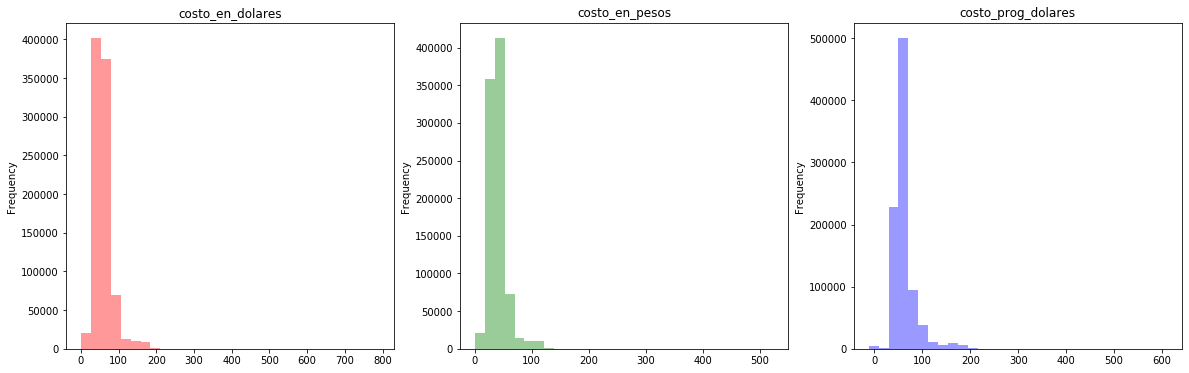

In [20]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(131)
costo_marginal["costo_en_dolares"].plot(kind='hist', color="red", alpha=0.4, bins=30, title = 'costo_en_dolares')


fig.add_subplot(132)
costo_marginal["costo_en_pesos"].plot(kind='hist', color="g", alpha=0.4 , bins=30, title = 'costo_en_pesos')


fig.add_subplot(133)
costo_marginal["costo"].plot(kind='hist', color="b", alpha=0.4, bins=30, title = 'costo_prog_dolares')

In [21]:
costo_marginal.groupby('barra_mnemotecnico')['costo'].nunique()

barra_mnemotecnico
BA01G004SE001T011    4059
BA01G004SE009G004    2784
BA01G004SE017G004    2651
BA01G004SE035G004     888
BA01G004SE036G004    2497
                     ... 
BA94G216SE031G216    3852
BA95L128SE193L128    3196
BA96L109SE032L109    3196
BA97G216SE106G216    3731
BA99L117SE054L117    3685
Name: costo, Length: 220, dtype: int64

In [22]:
len(list(costo_marginal.barra_mnemotecnico.unique()))

220

In [23]:
len(list(df_real.barra_mnemotecnico.unique()))

1020

* La base posee 900929 entradas, de las cuales no existe valores nulos
* Viendo los valores de la tabla del describe, existen outliers en los costos. Por ejemplo el valor maximo del costo real en dolares es de 791 USD.
* Tenemos 209 datos para distintas barras donde la hora llega a 25, ojo con esto.
* Costo en dolares y costo en peso (reales) distribuyen de igual forma, como debiese ser.
* Se programa el costo para 220 barras.
* Por la forma que se hizo el merge, para la base costo_marginal, el total de barras posee el costo. Si se hubiese hecho un merge (left) serían 220 barras de 1020, equivalente a un 21.56 %

# 2. Construcción de variables

In [24]:
costo_marginal['desviación'] = costo_marginal['costo_en_dolares'] - costo_marginal['costo']

In [25]:
costo_marginal['desviación_pct'] = 100 * \
    costo_marginal['desviación']/costo_marginal['costo_en_dolares']

In [26]:
costo_marginal['desviacion_cat'] = costo_marginal['desviación_pct'].apply(lambda x: 1 if x >15 or x<-15 else 0)

In [27]:
# Hay costos reales = 0, ojo con eso!
costo_marginal

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo,desviación,desviación_pct,desviacion_cat
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,54.292145,3.727855,6.425121,0
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648,2.979352,4.684516,0
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969,3.602031,5.737545,0
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605,3.983395,6.803407,0
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA S/E SAN CRISTOBAL 110KV B1,56.086260,4.303740,7.126576,0
...,...,...,...,...,...,...,...,...,...,...,...,...
900924,BA05T005SE288T005,BA02T002SE032T002,2019-01-23,24,63.65,42.79953,BA S/E SUR 110KV,BA S/E SUR 110KV,132.934674,-69.284673,-108.852590,1
900925,BA01L081SE066L081,BA02T002SE032T002,2019-01-23,24,73.18,49.20770,BA S/E FPC 154KV BP1,BA S/E FPC 154KV BP1,53.174872,20.005128,27.336879,1
900926,BA04T005SE071T005,BA02T002SE032T002,2019-01-23,24,67.20,45.18662,BA S/E OVALLE 66KV,BA S/E OVALLE 66KV,144.613620,-77.413620,-115.198840,1
900927,BA01L079SE004L079,BA02T002SE032T002,2019-01-23,24,77.61,52.18652,BA S/E PUENTE ALTO (CMPC) 110KV,BA S/E PUENTE ALTO (CMPC) 110KV,55.571525,22.038475,28.396438,1


In [28]:
costo_marginal.describe()

,hora,costo_en_dolares,costo_en_pesos,costo,desviación,desviación_pct,desviacion_cat
count,900929.000000,900929.000000,900929.000000,900929.000000,900929.000000,9.008940e+05,900929.000000
mean,12.502900,58.562186,39.509009,61.911302,-3.349116,NaN,0.272391
std,6.924005,23.326604,15.588484,23.870021,23.836284,NaN,0.445190
min,1.000000,0.000000,0.000000,-12.113677,-564.190000,-inf,0.000000
25%,7.000000,48.430000,32.553260,49.980377,-4.977872,-1.009717e+01,0.000000
50%,13.000000,53.330000,35.967440,55.066457,-0.817192,-1.532797e+00,0.000000
75%,19.000000,60.890000,41.252230,64.207188,0.873179,1.553823e+00,1.000000
max,25.000000,791.140000,523.418220,610.600000,686.702248,inf,1.000000


## Analisis !!

# 3.- Visualización de datos

In [29]:
costo_marginal['fecha'] =  pd.to_datetime(costo_marginal['fecha'])

In [30]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    df_barra = costo_marginal[costo_marginal['barra_mnemotecnico'] == codigo_barra] 
    # Rango de fechas
    mask = (df_barra['fecha'] >= fecha_inicial) & (df_barra['fecha'] <= fecha_final)
    df_barra = df_barra.loc[mask]
    df_barra = df_barra.sort_values('fecha')
    df_barra = df_barra.set_index('fecha')
    df_barra['costo_en_dolares'].plot(figsize = (15,6), legend = True)
    df_barra['costo'].plot(figsize = (15,6), legend = True, title = f'Gráfico barra {codigo_barra}')
    #return df_barra

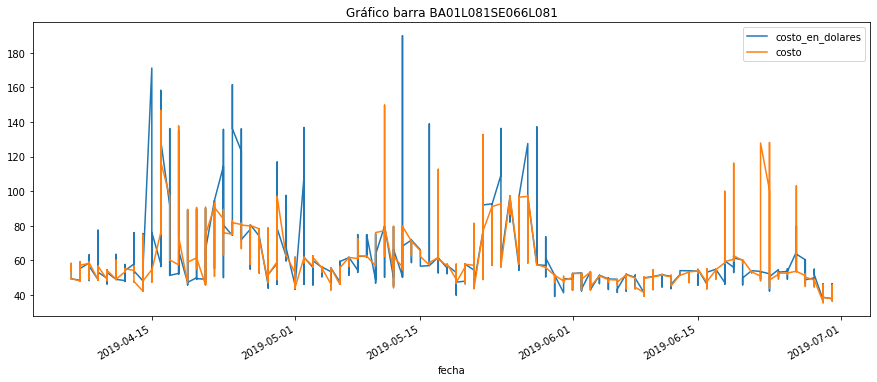

In [31]:
time_plot_costo_barra('BA01L081SE066L081', '2019-04-06', '2019-10-10')

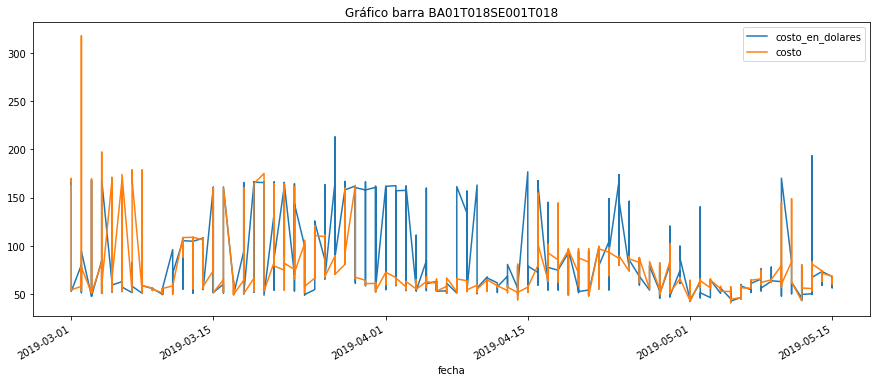

In [55]:
time_plot_costo_barra('BA01T018SE001T018', '2019-03-01', '2019-05-15')

## Analisis!!!

In [35]:
# Eliminar cmg_real = 0

In [36]:
costo_marginal.groupby('barra_mnemotecnico')['costo_en_dolares'].sum().sort_values()

barra_mnemotecnico
BA01G049SE001G049         0.00
BA01T005SE284T005     87694.41
BA36T027SE067G216    109536.66
BA48T027SE123G216    112470.83
BA69T005SE281T005    113723.98
                       ...    
BA01T002SE031T002    381423.65
BA01T003SE001G041    383131.89
BA01T003SE032T003    385685.04
BA01T003SE005T003    398608.74
BA01T003SE015T003    406604.96
Name: costo_en_dolares, Length: 220, dtype: float64

In [37]:
costo_marginal.shape

(900929, 12)

Vemos que la barra 'BA01G049SE001G049' tiene un costo marginal real en dolares igual a 0 durante todos los dias.

In [38]:
# Botamos esta barra de la base
costo_marginal = costo_marginal[costo_marginal.barra_mnemotecnico != 'BA01G049SE001G049']

In [39]:
# Eliminamos correctamente a la barra BA01G049SE001G049 del df.
costo_marginal.shape

(896584, 12)

# 4. Base para los modelos

In [40]:
df_pred = pd.read_csv(url_base_pred)
df_pred

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.000,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.000,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.000,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.000,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.000,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00 UTC,20,NaN,NaN,NaN,NaN,0.775,44.1,41.362200,2.74,6.62,3,9334786,30.14000
112775,SE170T005,2019-06-30 00:00:00 UTC,21,NaN,NaN,NaN,NaN,0.925,44.1,42.217780,1.88,4.45,3,9353773,30.14000
112776,SE170T005,2019-06-30 00:00:00 UTC,22,NaN,NaN,NaN,NaN,0.975,44.1,42.197451,1.90,4.50,3,9114529,30.14000
112777,SE170T005,2019-06-30 00:00:00 UTC,23,NaN,NaN,NaN,NaN,0.750,44.1,41.473556,2.63,6.34,3,8118728,30.14000


### Descripcion del df y variables!
## Analisis!!! 

In [41]:
df_pred['fecha'] =  pd.to_datetime(df_pred['fecha'])

In [42]:
# fecha está en año-mes-día
df_pred['año'] = df_pred['fecha'].dt.year
df_pred['mes'] = df_pred['fecha'].dt.month
df_pred['semana'] = df_pred['fecha'].dt.week
df_pred['dia_cal'] = df_pred['fecha'].dt.day
df_pred['dia_sem'] = df_pred['fecha'].dt.weekday  # 0 = lunes, 6 = domingo
df_pred['fin_de_semana'] = df_pred['dia_sem'].apply(lambda x: 1 if x >4 else 0)

In [43]:
df_pred.tail()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,semana,dia_cal,dia_sem,fin_de_semana
112774,SE170T005,2019-06-30 00:00:00+00:00,20,NaN,NaN,NaN,NaN,0.775,44.1,41.362200,...,6.62,3,9334786,30.14,2019,6,26,30,6,1
112775,SE170T005,2019-06-30 00:00:00+00:00,21,NaN,NaN,NaN,NaN,0.925,44.1,42.217780,...,4.45,3,9353773,30.14,2019,6,26,30,6,1
112776,SE170T005,2019-06-30 00:00:00+00:00,22,NaN,NaN,NaN,NaN,0.975,44.1,42.197451,...,4.50,3,9114529,30.14,2019,6,26,30,6,1
112777,SE170T005,2019-06-30 00:00:00+00:00,23,NaN,NaN,NaN,NaN,0.750,44.1,41.473556,...,6.34,3,8118728,30.14,2019,6,26,30,6,1
112778,SE170T005,2019-06-30 00:00:00+00:00,24,NaN,NaN,NaN,NaN,0.700,44.1,36.197329,...,21.82,3,6888256,30.14,2019,6,26,30,6,1


In [45]:
def plot_multiple(codigo_sub, variable, fecha):
    for i in fecha:
        df = df_pred[(df_pred['nemotecnico_se'] == codigo_sub)
                 & (df_pred['fecha'] == i)]
        df = df.sort_values('hora')
        df.set_index('hora', inplace = True)
        df[variable].plot(figsize = (15,6), legend = True,  
                          title = f'{codigo_sub}', label = f'{variable}  fecha: {i}')

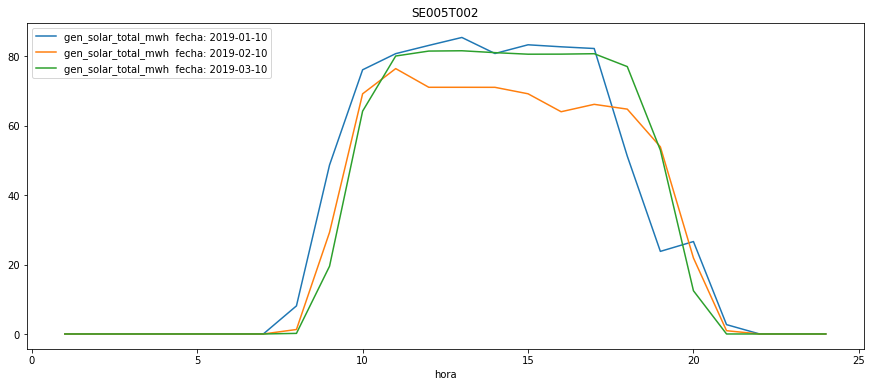

In [46]:
plot_multiple('SE005T002', 'gen_solar_total_mwh', ['2019-01-10', '2019-02-10', '2019-03-10' ])

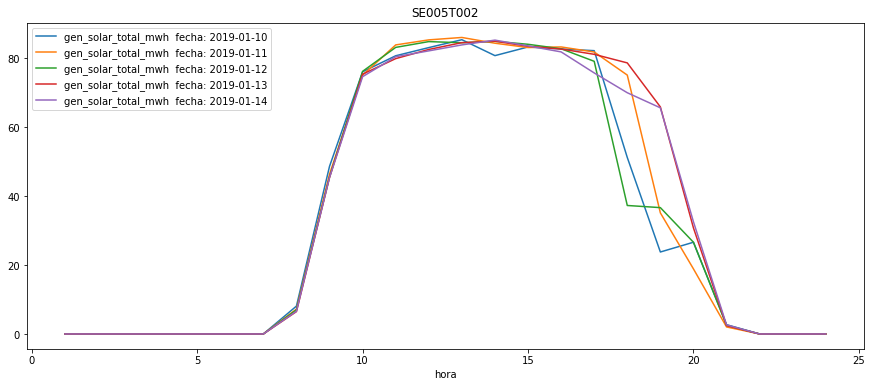

In [47]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14']
plot_multiple('SE005T002', 'gen_solar_total_mwh', fechas)

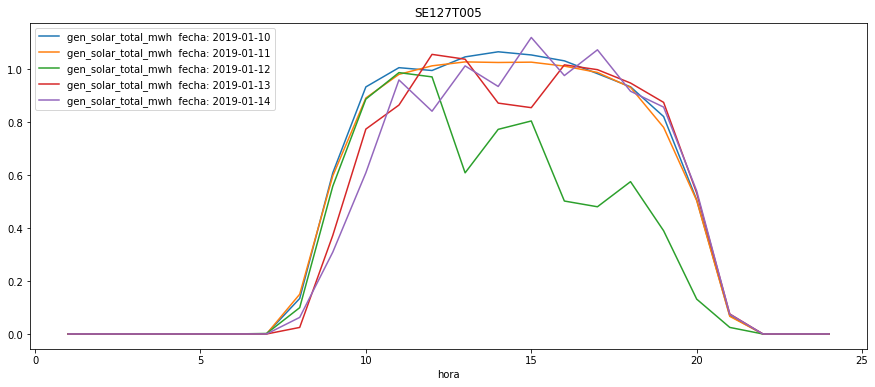

In [48]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14']
plot_multiple('SE127T005', 'gen_solar_total_mwh', fechas)

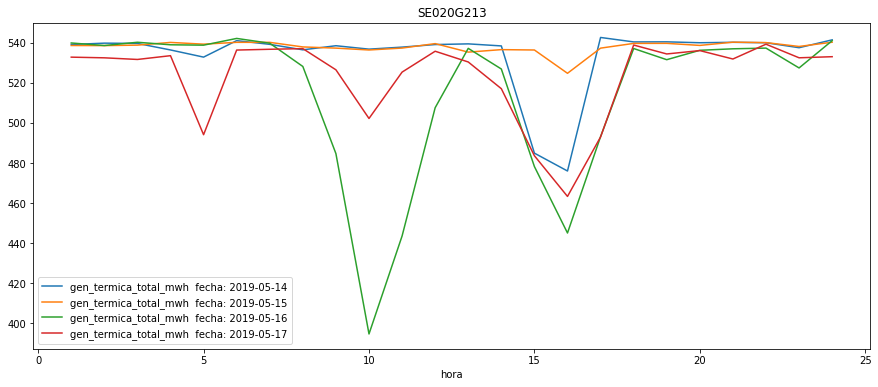

In [50]:
fechas = ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17']
plot_multiple('SE020G213', 'gen_termica_total_mwh', fechas)

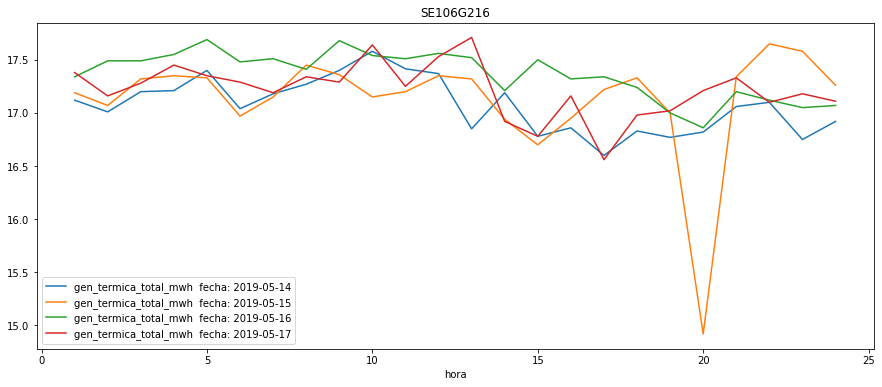

In [51]:
fechas = ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17']
plot_multiple('SE106G216', 'gen_termica_total_mwh', fechas)

# 5. Predicción de desviaciones del costo marginal: modelo 1

In [52]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [55]:
df_pred.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana',
       'target'],
      dtype='object')

In [56]:
df_pred['target'] = df_pred['cmg_desv_pct'].apply(lambda x: 0 if x >15 or x<-15 else 1)

In [57]:
df_pred['en_total_mwh'] = df_pred.iloc[:,3:8].sum(axis=1)

In [58]:
df_pred.describe()

,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,...,demanda_mwh,cap_inst_mw,año,mes,semana,dia_cal,dia_sem,fin_de_semana,target,en_total_mwh
count,112779.000000,0.0,0.0,34184.000000,41818.000000,61863.000000,112779.000000,112779.000000,112779.000000,112779.00,...,1.127790e+05,112779.000000,112779.0,112779.000000,112779.000000,112779.000000,112779.000000,112779.00000,112779.000000,112779.000000
mean,12.502993,NaN,NaN,38.120053,3.764987,40.583146,61.170058,62.215400,-1.045338,inf,...,6.357056e+07,128.719565,2019.0,3.512675,13.580773,15.557098,3.011545,0.28625,0.747373,35.211655
std,6.924090,NaN,NaN,69.838109,12.904388,101.083396,25.414147,25.307759,24.711575,NaN,...,3.948683e+08,167.948649,0.0,1.690061,7.369632,8.750816,1.991979,0.45201,0.434521,85.184520
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3403.97,...,-9.821095e+09,2.989800,2019.0,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,7.000000,NaN,NaN,0.849787,0.000000,0.000000,49.130000,49.906745,-3.790000,-7.07,...,7.464800e+05,18.420000,2019.0,2.000000,7.000000,8.000000,1.000000,0.00000,0.000000,0.000000
50%,13.000000,NaN,NaN,9.600000,0.000000,0.000000,54.610000,55.420601,-0.310000,-0.58,...,4.507282e+06,51.850000,2019.0,4.000000,14.000000,16.000000,3.000000,0.00000,1.000000,2.131754
75%,19.000000,NaN,NaN,40.000000,1.571022,15.960000,63.500000,64.701951,1.670000,2.92,...,1.332345e+07,184.685500,2019.0,5.000000,20.000000,23.000000,5.000000,1.00000,1.000000,19.100000
max,25.000000,NaN,NaN,472.000000,86.050000,570.600800,240.360000,610.600000,175.020000,inf,...,1.004240e+10,597.782800,2019.0,6.000000,26.000000,31.000000,6.000000,1.00000,1.000000,570.600800


In [59]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112779 entries, 0 to 112778
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   nemotecnico_se            112779 non-null  object             
 1   fecha                     112779 non-null  datetime64[ns, UTC]
 2   hora                      112779 non-null  int64              
 3   gen_eolica_total_mwh      0 non-null       float64            
 4   gen_geotermica_total_mwh  0 non-null       float64            
 5   gen_hidraulica_total_mwh  34184 non-null   float64            
 6   gen_solar_total_mwh       41818 non-null   float64            
 7   gen_termica_total_mwh     61863 non-null   float64            
 8   cmg_real                  112779 non-null  float64            
 9   cmg_prog                  112779 non-null  float64            
 10  cmg_desv                  112779 non-null  float64            
 11  

In [176]:
# Botar geo eolica y geotermica por ser nulls todos!

In [60]:
df_pred.drop(['gen_eolica_total_mwh', 'gen_geotermica_total_mwh'], axis = 1, inplace = True)

In [61]:
df_pred.sort_values(['nemotecnico_se', 'fecha', 'hora'], inplace=True)
df_pred.reset_index(inplace=True)
del df_pred['index']

### Crear features

In [22]:
# rolling para el total energia de 3,6,12 y 24 horas

In [64]:
df_1 = df_pred.copy()

In [65]:
def roll_win(df, func, col, ventana):
    name = col+f'_{func}_{ventana}'
    if func == 'mean':
        df[name] = df.groupby(['nemotecnico_se'])[col].rolling(ventana).mean().reset_index(drop=True)
    elif func == 'std':
        df[name] = df.groupby(['nemotecnico_se'])[col].rolling(ventana).std().reset_index(drop=True)
    return df

In [66]:
def lag(df, col, ventana):
    name = col+f'_lag_{ventana}'
    df[name] = df.groupby(['nemotecnico_se'])[col].shift(ventana)
    return df

In [67]:
lista_ventana = [2, 4, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv_pct']
for i in lista_ventana:
    for col in cols:
        df_1 = roll_win(df_1, 'mean', col, i)
        df_1 = roll_win(df_1, 'std', col, i)

In [71]:
lags = [1,2,4,6]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv_pct']
for i in lags:
    for col in cols:
        df_1 = lag(df_1, col, i)

In [72]:
df_1['target_shift'] = df_1.groupby(['nemotecnico_se'])['target'].shift(-1)

In [73]:
df_1.dropna(subset = ['target_shift'], inplace = True)

In [74]:
df_1

,nemotecnico_se,fecha,hora,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,...,cmg_desv_pct_lag_2,en_total_mwh_lag_4,cmg_real_lag_4,cmg_prog_lag_4,cmg_desv_pct_lag_4,en_total_mwh_lag_6,cmg_real_lag_6,cmg_prog_lag_6,cmg_desv_pct_lag_6,target_shift
0,SE001T002,2019-01-01 00:00:00+00:00,1,NaN,0.0,0.000,54.03,124.604410,-70.57,-56.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,SE001T002,2019-01-01 00:00:00+00:00,2,NaN,0.0,0.000,54.03,125.415516,-71.39,-56.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,SE001T002,2019-01-01 00:00:00+00:00,3,NaN,0.0,0.000,54.03,52.383209,1.65,3.15,...,-56.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,SE001T002,2019-01-01 00:00:00+00:00,4,NaN,0.0,0.000,54.03,53.482023,0.55,1.03,...,-56.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,SE001T002,2019-01-01 00:00:00+00:00,5,NaN,0.0,0.000,54.03,52.260469,1.77,3.39,...,3.15,0.000,54.03,124.604410,-56.64,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112773,SE170T005,2019-06-30 00:00:00+00:00,19,NaN,NaN,0.900,44.10,41.056476,3.04,7.40,...,5.55,1.200,33.03,32.663836,1.13,1.125,33.07,32.113205,2.99,1.0
112774,SE170T005,2019-06-30 00:00:00+00:00,20,NaN,NaN,0.775,44.10,41.362200,2.74,6.62,...,5.79,0.825,33.03,36.262319,-8.91,1.150,33.03,32.236458,2.45,1.0
112775,SE170T005,2019-06-30 00:00:00+00:00,21,NaN,NaN,0.925,44.10,42.217780,1.88,4.45,...,7.40,0.950,38.59,36.558397,5.55,1.200,33.03,32.663836,1.13,1.0
112776,SE170T005,2019-06-30 00:00:00+00:00,22,NaN,NaN,0.975,44.10,42.197451,1.90,4.50,...,6.62,0.900,40.17,37.971035,5.79,0.825,33.03,36.262319,-8.91,1.0


Vamos a usar xgboost, que se hace cargo de los datos faltantes de manera automatica. Solo debememos eliminar la fila que no tenga target.

In [75]:
encoder = LabelEncoder()

In [76]:
df_1['nemotecnico_se_en'] = encoder.fit_transform(df_1['nemotecnico_se'])

## Comentar sobre el desbalance de clases

In [77]:
int(df_1['target_shift'].sum())

84269

In [104]:
df_1.shape

(112750, 70)

## Entrenar

In [103]:
Y = df_1.pop('target_shift')

KeyError: 'target_shift'

In [105]:
X = df_1.copy()

In [106]:
X.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'target',
       'en_total_mwh', 'en_total_mwh_mean_2', 'en_total_mwh_std_2',
       'cmg_real_mean_2', 'cmg_real_std_2', 'cmg_prog_mean_2',
       'cmg_prog_std_2', 'cmg_desv_pct_mean_2', 'cmg_desv_pct_std_2',
       'en_total_mwh_mean_4', 'en_total_mwh_std_4', 'cmg_real_mean_4',
       'cmg_real_std_4', 'cmg_prog_mean_4', 'cmg_prog_std_4',
       'cmg_desv_pct_mean_4', 'cmg_desv_pct_std_4', 'en_total_mwh_mean_12',
       'en_total_mwh_std_12', 'cmg_real_mean_12', 'cmg_real_std_12',
       'cmg_prog_mean_12', 'cmg_prog_std_12', 'cmg_desv_pct_mean_12',
       'cmg_desv_pct_std_12', 'en_total_mwh_mean_24', 'en_total_mwh_std_24',
       'cmg_real_mean_24', 'cmg_real_std_24', 'cmg_prog_mean_24',
  

In [107]:
X.describe()

,hora,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,...,cmg_desv_pct_lag_2,en_total_mwh_lag_4,cmg_real_lag_4,cmg_prog_lag_4,cmg_desv_pct_lag_4,en_total_mwh_lag_6,cmg_real_lag_6,cmg_prog_lag_6,cmg_desv_pct_lag_6,nemotecnico_se_en
count,112750.000000,34176.000000,41808.000000,61844.000000,112750.000000,112750.000000,112750.000000,112750.00,112750.000000,1.127500e+05,...,112692.00,112634.000000,112634.000000,112634.000000,112634.00,112576.000000,112576.000000,112576.000000,1.125760e+05,112750.000000
mean,12.500035,38.122095,3.765887,40.582178,61.172917,62.219142,-1.046222,inf,2.331849,6.358313e+07,...,inf,35.199484,61.184603,62.230975,inf,35.196176,61.191549,62.239256,inf,13.400701
std,6.922524,69.842946,12.905800,101.074386,25.416181,25.308808,24.713614,NaN,1.304107,3.949181e+08,...,NaN,85.131803,25.425160,25.315127,NaN,85.113434,25.429792,25.318868,NaN,8.494013
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3403.97,1.000000,-9.821095e+09,...,-3403.97,0.000000,0.000000,-1.713131,-3403.97,0.000000,0.000000,-1.713131,-3.403970e+03,0.000000
25%,6.250000,0.849542,0.000000,0.000000,49.130000,49.910497,-3.790000,-7.07,1.000000,7.464550e+05,...,-7.07,0.000000,49.140000,49.925394,-7.08,0.000000,49.150000,49.932656,-7.080000e+00,6.000000
50%,12.000000,9.600000,0.000000,0.000000,54.610000,55.424313,-0.315000,-0.58,2.000000,4.507394e+06,...,-0.58,2.136302,54.616667,55.434377,-0.58,2.139057,54.625000,55.438776,-5.858333e-01,12.000000
75%,18.000000,40.000000,1.572676,15.960000,63.500000,64.707411,1.670000,2.92,3.000000,1.332242e+07,...,2.92,19.100000,63.506667,64.723835,2.92,19.100000,63.510000,64.737451,2.916250e+00,20.000000
max,25.000000,472.000000,86.050000,570.600800,240.360000,610.600000,175.020000,inf,6.000000,1.004240e+10,...,inf,570.600800,240.360000,610.600000,inf,570.600800,240.360000,610.600000,inf,28.000000


In [108]:
X = X.replace([np.inf, -np.inf], np.nan)

### Split

In [88]:
mask = X.fecha > '2019-05-23'
mask.mean()

0.20282926829268294

In [89]:
y_train = Y[~mask]
X_train = X[~mask]
y_test = Y[mask]
X_test = X[mask]

In [90]:
X_train.drop(['nemotecnico_se', 'target', 'fecha'], axis=1, inplace=True)
X_test.drop(['nemotecnico_se', 'target', 'fecha'], axis=1, inplace=True)
features = list(X_train.columns)

C:\Users\Oscar\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_train shape:  {y_train.shape}')
print(f'y_test shape:  {y_test.shape}')
print(features)

X_train shape:  (89881, 67)
X_test shape:  (22869, 67)
y_train shape:  (89881,)
y_test shape:  (22869,)
['hora', 'gen_hidraulica_total_mwh', 'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw', 'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'en_total_mwh', 'en_total_mwh_mean_2', 'en_total_mwh_std_2', 'cmg_real_mean_2', 'cmg_real_std_2', 'cmg_prog_mean_2', 'cmg_prog_std_2', 'cmg_desv_pct_mean_2', 'cmg_desv_pct_std_2', 'en_total_mwh_mean_4', 'en_total_mwh_std_4', 'cmg_real_mean_4', 'cmg_real_std_4', 'cmg_prog_mean_4', 'cmg_prog_std_4', 'cmg_desv_pct_mean_4', 'cmg_desv_pct_std_4', 'en_total_mwh_mean_12', 'en_total_mwh_std_12', 'cmg_real_mean_12', 'cmg_real_std_12', 'cmg_prog_mean_12', 'cmg_prog_std_12', 'cmg_desv_pct_mean_12', 'cmg_desv_pct_std_12', 'en_total_mwh_mean_24', 'en_total_mwh_std_24', 'cmg_real_mean_24', 'cmg_real_std_24', 'cmg_prog_mean_24', 'cmg_prog_std_24', 'cmg_desv_pct

# Normalizamos las variables

In [92]:
norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Oscar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Oscar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
xgb = XGBClassifier()

In [94]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [95]:
ypredxgb = xgb.predict(X_test)

In [96]:
metrics.accuracy_score(y_test, ypredxgb)

0.9103152739516376

In [97]:
metrics.roc_auc_score(y_test, ypredxgb)

0.721809921796347

In [98]:
cmmxgb = confusion_matrix(y_test, ypredxgb)
cmmxgb

array([[ 1279,  1412],
       [  639, 19539]], dtype=int64)

In [99]:
print(classification_report(y_test, ypredxgb))

              precision    recall  f1-score   support

         0.0       0.67      0.48      0.56      2691
         1.0       0.93      0.97      0.95     20178

   micro avg       0.91      0.91      0.91     22869
   macro avg       0.80      0.72      0.75     22869
weighted avg       0.90      0.91      0.90     22869



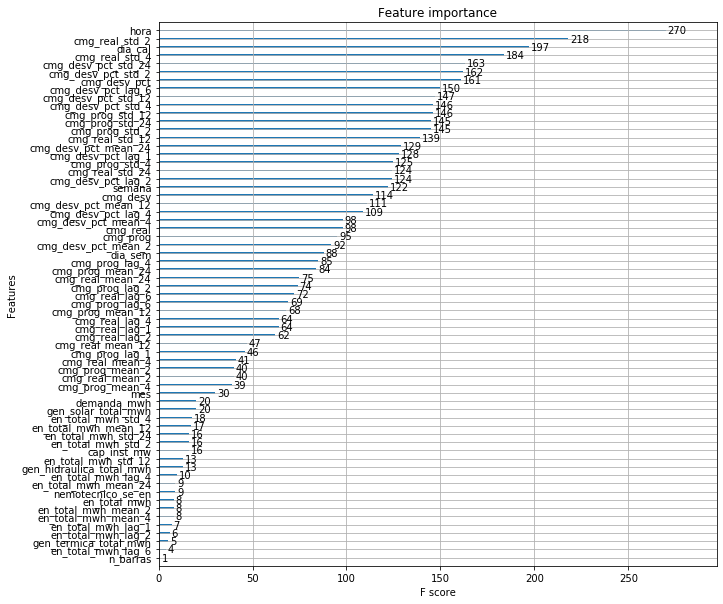

In [110]:
X.drop(['fecha', 'nemotecnico_se', 'target'], axis=1, inplace=True)
mapper = {'f{0}'.format(i): v for i, v in enumerate(X.columns)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_fscore().items()}
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(mapped, ax=ax)
plt.show()

# 6. Predicción de desviaciones del costo marginal: modelo 2

### explicar que vamos a hacer, las opciones que habia y pq me decidi por la que hice

In [89]:
# Cargar el dataset de nuevo, ya que tenemos que generar los lags y los rollin nuevos

In [90]:
# cargar, remplazar los infinitos por nan
# Generar las nuevas variables
# hacer el shift con -12 para el target
# Cuidado de nuevo con los infinitos 
# Separar las bases de datos de nuevo en la misma ventana de tiempo (mask)
# 

In [138]:
df_2 = df_pred.copy()

In [139]:
lista_ventana = [2, 4, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv_pct']
for i in lista_ventana:
    for col in cols:
        df_2 = roll_win(df_2, 'mean', col, i)
        df_2 = roll_win(df_2, 'std', col, i)

In [140]:
lags = [1, 2, 4, 6, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv_pct']
for i in lags:
    for col in cols:
        df_2 = lag(df_2, col, i)

In [141]:
df_2['target_shift'] = df_2.groupby(['nemotecnico_se'])['target'].shift(-12)

In [142]:
df_2.dropna(subset = ['target_shift'], inplace = True)
encoder = LabelEncoder()
df_2['nemotecnico_se_en'] = encoder.fit_transform(df_2['nemotecnico_se'])

In [153]:
X = df_2.copy()
Y = X.pop('target_shift')

In [155]:
X = X.replace([np.inf, -np.inf], np.nan)
mask = X.fecha > '2019-05-23'
mask.mean()
y_train = Y[~mask]
X_train = X[~mask]
y_test = Y[mask]
X_test = X[mask]
X_train.drop(['nemotecnico_se', 'target', 'fecha'], axis=1, inplace=True)
X_test.drop(['nemotecnico_se', 'target', 'fecha'], axis=1, inplace=True)
features = list(X_train.columns)

C:\Users\Oscar\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [156]:
print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_train shape:  {y_train.shape}')
print(f'y_test shape:  {y_test.shape}')
print(features)

X_train shape:  (89859, 75)
X_test shape:  (22572, 75)
y_train shape:  (89859,)
y_test shape:  (22572,)
['hora', 'gen_hidraulica_total_mwh', 'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw', 'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'en_total_mwh', 'en_total_mwh_mean_2', 'en_total_mwh_std_2', 'cmg_real_mean_2', 'cmg_real_std_2', 'cmg_prog_mean_2', 'cmg_prog_std_2', 'cmg_desv_pct_mean_2', 'cmg_desv_pct_std_2', 'en_total_mwh_mean_4', 'en_total_mwh_std_4', 'cmg_real_mean_4', 'cmg_real_std_4', 'cmg_prog_mean_4', 'cmg_prog_std_4', 'cmg_desv_pct_mean_4', 'cmg_desv_pct_std_4', 'en_total_mwh_mean_12', 'en_total_mwh_std_12', 'cmg_real_mean_12', 'cmg_real_std_12', 'cmg_prog_mean_12', 'cmg_prog_std_12', 'cmg_desv_pct_mean_12', 'cmg_desv_pct_std_12', 'en_total_mwh_mean_24', 'en_total_mwh_std_24', 'cmg_real_mean_24', 'cmg_real_std_24', 'cmg_prog_mean_24', 'cmg_prog_std_24', 'cmg_desv_pct

In [157]:
norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
xgb_2 = XGBClassifier()
xgb_2.fit(X_train, y_train)
ypredxgb = xgb_2.predict(X_test)

C:\Users\Oscar\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Oscar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Oscar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
metrics.accuracy_score(y_test, ypredxgb)

0.8592947013999646

In [160]:
metrics.roc_auc_score(y_test, ypredxgb)

0.5358736854495596

In [159]:
cmmxgb = confusion_matrix(y_test, ypredxgb)
cmmxgb

array([[  301,  2254],
       [  922, 19095]], dtype=int64)

In [161]:
print(classification_report(y_test, ypredxgb))

              precision    recall  f1-score   support

         0.0       0.25      0.12      0.16      2555
         1.0       0.89      0.95      0.92     20017

   micro avg       0.86      0.86      0.86     22572
   macro avg       0.57      0.54      0.54     22572
weighted avg       0.82      0.86      0.84     22572



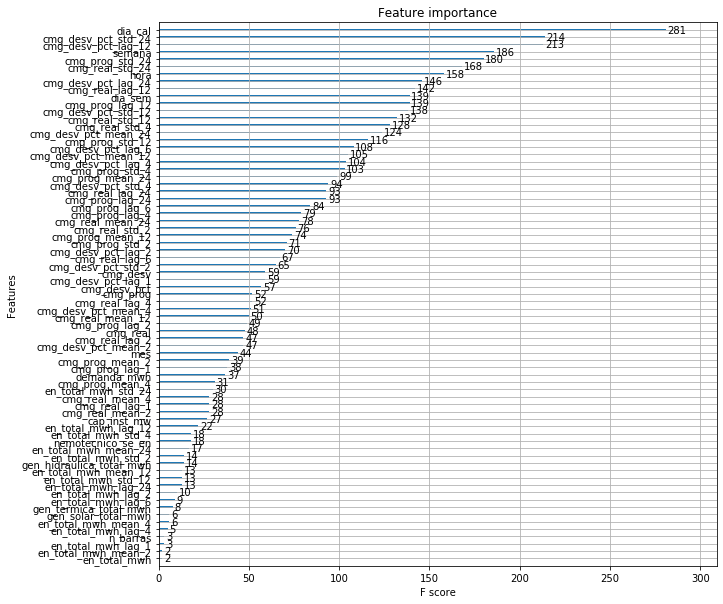

In [164]:
#X.drop(['fecha', 'nemotecnico_se', 'target'], axis=1, inplace=True)
mapper = {'f{0}'.format(i): v for i, v in enumerate(X.columns)}
mapped = {mapper[k]: v for k, v in xgb_2.get_booster().get_fscore().items()}
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(mapped, ax=ax)
plt.show()

# 7. Merge con datos de clima: modelo 3

In [215]:
df_3 = df_pred.copy()

In [216]:
df_clima = pd.read_csv(url_clima)

In [217]:
df_clima['fecha'] = df_clima['fecha'].astype('datetime64[ns]')
df_3['fecha'] = df_3['fecha'].astype('datetime64[ns]')
df_clima['fecha'] = pd.to_datetime(df_clima['fecha'].dt.strftime('%Y-%m-%d'))

In [218]:
df_3 = pd.merge(df_3, df_clima, how='left', left_on=['fecha','nemotecnico_se'], right_on=['fecha','subestacion'])

In [219]:
df_3.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'target',
       'en_total_mwh', 'subestacion', 'lat', 'lon', 'ALLSKY_SFC_SW_DWN', 'KT',
       'PRECTOT', 'RH2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TQV', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN'],
      dtype='object')

In [220]:
lista_ventana = [2, 4, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv_pct']
for i in lista_ventana:
    for col in cols:
        df_3 = roll_win(df_3, 'mean', col, i)
        df_3 = roll_win(df_3, 'std', col, i)

Vamos a hacer la comparación sin agregar nuevas variables temporales: las mismas de antes pero con los nuevos datos del clima

In [221]:
lags = [1, 2, 4, 6, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv_pct']
for i in lags:
    for col in cols:
        df_3 = lag(df_3, col, i)

In [222]:
df_3['target_shift'] = df_3.groupby(['nemotecnico_se'])['target'].shift(-12)

In [223]:
df_3.dropna(subset = ['target_shift'], inplace = True)
encoder = LabelEncoder()
df_3['nemotecnico_se_en'] = encoder.fit_transform(df_3['nemotecnico_se'])

In [232]:
X = df_3.copy()
X = X.replace([np.inf, -np.inf], np.nan)
Y = X.pop('target_shift')
mask = X.fecha > '2019-05-23'
mask.mean()
y_train = Y[~mask]
X_train = X[~mask]
y_test = Y[mask]
X_test = X[mask]
X_train.drop(['nemotecnico_se', 'target', 'fecha', 'subestacion'], axis=1, inplace=True)
X_test.drop(['nemotecnico_se', 'target', 'fecha', 'subestacion'], axis=1, inplace=True)
features = list(X_train.columns)

C:\Users\Oscar\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [234]:
print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_train shape:  {y_train.shape}')
print(f'y_test shape:  {y_test.shape}')
print(features)

X_train shape:  (89859, 93)
X_test shape:  (22572, 93)
y_train shape:  (89859,)
y_test shape:  (22572,)
['hora', 'gen_hidraulica_total_mwh', 'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw', 'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'en_total_mwh', 'lat', 'lon', 'ALLSKY_SFC_SW_DWN', 'KT', 'PRECTOT', 'RH2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TQV', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'en_total_mwh_mean_2', 'en_total_mwh_std_2', 'cmg_real_mean_2', 'cmg_real_std_2', 'cmg_prog_mean_2', 'cmg_prog_std_2', 'cmg_desv_pct_mean_2', 'cmg_desv_pct_std_2', 'en_total_mwh_mean_4', 'en_total_mwh_std_4', 'cmg_real_mean_4', 'cmg_real_std_4', 'cmg_prog_mean_4', 'cmg_prog_std_4', 'cmg_desv_pct_mean_4', 'cmg_desv_pct_std_4', 'en_total_mwh_mean_12', 'en_total_mwh_std_12', 'cmg_real_mean_12', 'cmg_real_std_12', 'cmg_prog_mean_12', 'cmg_prog_std_12', 'cm

In [236]:
norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [237]:
xgb_3 = XGBClassifier()
xgb_3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [238]:
ypredxgb = xgb_3.predict(X_test)

In [239]:
metrics.accuracy_score(y_test, ypredxgb)

0.8504784688995215

In [242]:
metrics.roc_auc_score(y_test, ypredxgb)

0.5320979222455433

In [243]:
cmmxgb = confusion_matrix(y_test, ypredxgb)
cmmxgb

array([[  308,  2247],
       [ 1128, 18889]], dtype=int64)

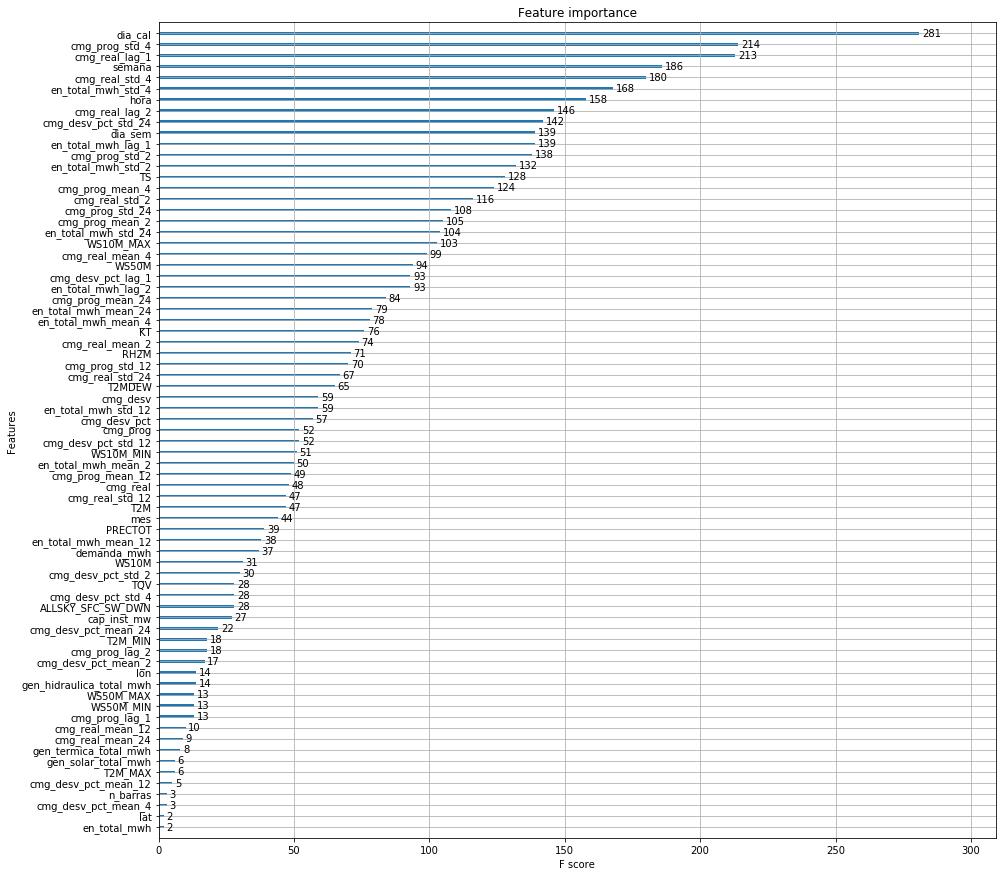

In [249]:
#X.drop(['nemotecnico_se', 'target', 'fecha', 'subestacion'], axis=1, inplace=True)
mapper = {'f{0}'.format(i): v for i, v in enumerate(X.columns)}
mapped = {mapper[k]: v for k, v in xgb_2.get_booster().get_fscore().items()}
fig, ax = plt.subplots(figsize=(15,15))
plot_importance(mapped, ax=ax)
plt.show()

In [ ]:
# Son muy pocos datos del clima y no genere variables extras acumuladas de estos

# 8. Reflexión

In [ ]:
# ¿Por qué sería bueno utilizar un modelo como este para anticiparse a desvíos de precios de la energía?
# ¿Qué casos de uso te imaginas podrían beneficiarse teniendo acceso a un modelo como este?